## Machine Learning
### Linear regression with least squares
In **linear regression**, we assume we can model the data points with a linear function as:
<br> $y=w_0+w_1x_1+w_2x_2+....w_{p-1}x_{p-1}$
<br>Given data points $(\boldsymbol{x}_i,y_i)$ we may find the best estimate for parameter vector $\boldsymbol{w}$ using the **least squares method**:<br>
$\boldsymbol{w}=X^+ \boldsymbol{y}$
<br> where $X^+=(X^TX)^{-1}X^T$, and it it called the **pseudo-inverse** of $X$. 
<br> **Reminder:** The rows of matrix $X$ are composed of $\boldsymbol{x}_i$ such the the first column is all one.
<hr>
The Python code at: https://github.com/ostad-ai/Machine-Learning
<br> Explanation: https://www.pinterest.com/HamedShahHosseini/Machine-Learning/

In [1]:
# importing required modules
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# least squares estimator for (p-1)-dimensional data points xi
# computes pseudo-inverse of the given matrix X
# we could simply use np.linalg.pinv(X)
def pinverse(X):
    return np.linalg.inv(X.T@X)@X.T

# Xs is a matrix with n rows and p-1 columns
# ys is a column vector of size n holding the dependent values yi
def least_squares_estimator(Xs,ys):
    X=np.ones((Xs.shape[0],Xs.shape[1]+1))
    X[:,1:]=Xs.copy()
    w=pinverse(X)@ys.reshape(-1,1)
    return w.flatten()

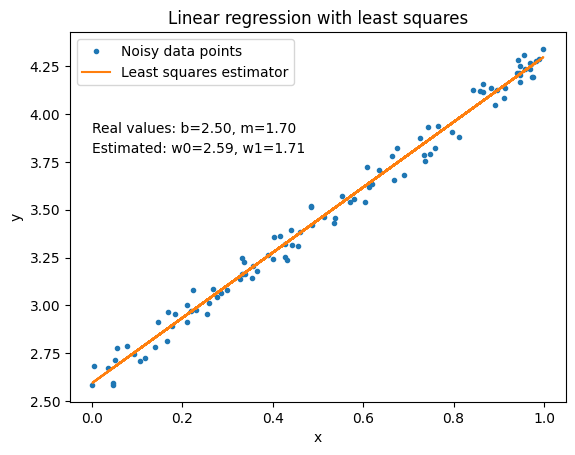

In [3]:
# example
m,b,noise,Ndata,p=1.7,2.5,.2,100,2
xs=np.random.rand(Ndata)
Xs=xs.reshape(len(xs),p-1)
ys=m*xs+b+noise*np.random.rand(Ndata)
b_hat,m_hat=least_squares_estimator(Xs,ys)
ys_hat=b_hat+m_hat*xs
plt.plot(xs,ys,'.',label='Noisy data points')
plt.plot(xs,ys_hat,'-',label='Least squares estimator')
plt.xlabel('x'); plt.ylabel('y'); plt.legend()
plt.title('Linear regression with least squares')
plt.text(0,3.9,f'Real values: b={b:.2f}, m={m:.2f}')
plt.text(0,3.8,f'Estimated: w0={b_hat:.2f}, w1={m_hat:.2f}')
plt.show()